<a href="https://colab.research.google.com/github/luciana11levy/coder/blob/main/Mapa_Australia_lluvias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#pip install geopandas

In [25]:
pip install folium

In [37]:
import geopandas as gpd
import pandas as pd

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


,STATE_CODE,STATE_NAME,geometry
0,1,New South Wales,"POLYGON ((149.97668 -37.50506, 148.19495 -36.7..."
1,2,Victoria,"POLYGON ((140.96574 -38.05599, 140.96362 -33.9..."
2,3,Queensland,"MULTIPOLYGON (((153.47693 -28.15702, 153.10883..."
3,4,South Australia,"MULTIPOLYGON (((129.00134 -31.68707, 129.00185..."
4,5,Western Australia,"POLYGON ((129.00124 -14.87947, 129.00134 -31.6..."
5,6,Tasmania,"MULTIPOLYGON (((144.75446 -41.06182, 144.68604..."
6,7,Northern Territory,"MULTIPOLYGON (((138.00118 -16.54451, 137.99905..."
7,8,Australian Capital Territory,"POLYGON ((149.39928 -35.31918, 149.35213 -35.3..."


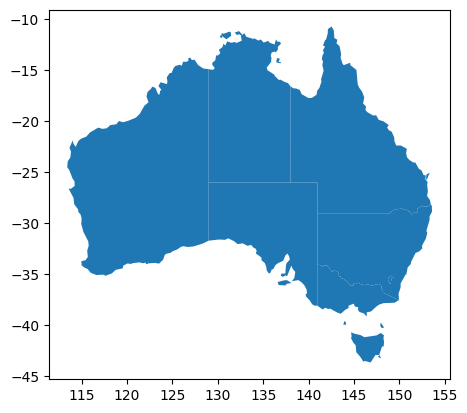

In [29]:
# Ruta del archivo TopoJSON
ruta_archivo = '/content/australian-states.json'

# Leer el archivo TopoJSON como un DataFrame de GeoPandas
gdf = gpd.read_file(ruta_archivo, driver='TopoJSON')

# Visualizar el mapa
gdf.plot()


gdf

In [38]:
df_australia= pd.read_csv('/content/au.csv')
df_australia

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714
...,...,...,...,...,...,...,...,...,...
1030,The Palms,-26.1902,152.5861,Australia,AU,Queensland,NaN,1010,1010
1031,Millfield,-32.8886,151.2614,Australia,AU,New South Wales,NaN,1006,1006
1032,Dunbogan,-31.6500,152.8167,Australia,AU,New South Wales,NaN,1002,1002
1033,Tomakin,-35.8228,150.1894,Australia,AU,New South Wales,NaN,1001,1001


In [41]:
# Rename the 'admin_name' column to 'STATE_NAME' in the GeoDataFrame
df_australia = df_australia.rename(columns={'admin_name': 'STATE_NAME'})

df_australia

,city,lat,lng,country,iso2,STATE_NAME,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714
...,...,...,...,...,...,...,...,...,...
1030,The Palms,-26.1902,152.5861,Australia,AU,Queensland,NaN,1010,1010
1031,Millfield,-32.8886,151.2614,Australia,AU,New South Wales,NaN,1006,1006
1032,Dunbogan,-31.6500,152.8167,Australia,AU,New South Wales,NaN,1002,1002
1033,Tomakin,-35.8228,150.1894,Australia,AU,New South Wales,NaN,1001,1001


In [42]:
# Merge the dataframes
merged_gdf = gdf.merge(df_australia, on='STATE_NAME', how='left')

# Display the merged GeoDataFrame
merged_gdf

,STATE_CODE,STATE_NAME,geometry,city,lat,lng,country,iso2,capital,population,population_proper
0,1,New South Wales,"POLYGON ((149.97668 -37.50506, 148.19495 -36.7...",Sydney,-33.8650,151.2094,Australia,AU,admin,5312163,4840600
1,1,New South Wales,"POLYGON ((149.97668 -37.50506, 148.19495 -36.7...",Newcastle,-32.9167,151.7500,Australia,AU,NaN,322278,152984
2,1,New South Wales,"POLYGON ((149.97668 -37.50506, 148.19495 -36.7...",Wollongong,-34.4331,150.8831,Australia,AU,NaN,302739,289236
3,1,New South Wales,"POLYGON ((149.97668 -37.50506, 148.19495 -36.7...",Maitland,-32.7167,151.5500,Australia,AU,NaN,78015,1885
4,1,New South Wales,"POLYGON ((149.97668 -37.50506, 148.19495 -36.7...",Coffs Harbour,-30.3022,153.1189,Australia,AU,NaN,71822,25752
...,...,...,...,...,...,...,...,...,...,...,...
1030,7,Northern Territory,"MULTIPOLYGON (((138.00118 -16.54451, 137.99905...",Port Keats,-14.2333,129.5170,Australia,AU,NaN,2280,2280
1031,7,Northern Territory,"MULTIPOLYGON (((138.00118 -16.54451, 137.99905...",Katherine,-14.4667,132.2667,Australia,AU,NaN,1488,1488
1032,7,Northern Territory,"MULTIPOLYGON (((138.00118 -16.54451, 137.99905...",Yulara,-25.2406,130.9889,Australia,AU,NaN,1099,1099
1033,7,Northern Territory,"MULTIPOLYGON (((138.00118 -16.54451, 137.99905...",Jabiru,-12.6667,132.8333,Australia,AU,NaN,1081,1081


In [43]:

ruta_precipitaciones = '/content/weatherAUS.csv.zip'

# Leer el archivo CSV
df_precipitaciones = pd.read_csv(ruta_precipitaciones)
df_precipitaciones

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [48]:
gdf
df_australia= pd.read_csv('/content/au.csv')
df_australia
# Rename the 'admin_name' column to 'STATE_NAME' in the GeoDataFrame
df_australia = df_australia.rename(columns={'admin_name': 'STATE_NAME'})

df_australia


# Assuming gdf and df_australia are already defined as in the previous code

# Merge the dataframes
merged_gdf = gdf.merge(df_australia, on='STATE_NAME', how='left')

# Display the merged GeoDataFrame
merged_gdf

ruta_precipitaciones = '/content/weatherAUS.csv.zip'

# Leer el archivo CSV
df_precipitaciones = pd.read_csv(ruta_precipitaciones)

# Rename the 'Location' column to 'city'
df_precipitaciones = df_precipitaciones.rename(columns={'Location': 'city'})

df_precipitaciones

,Date,city,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


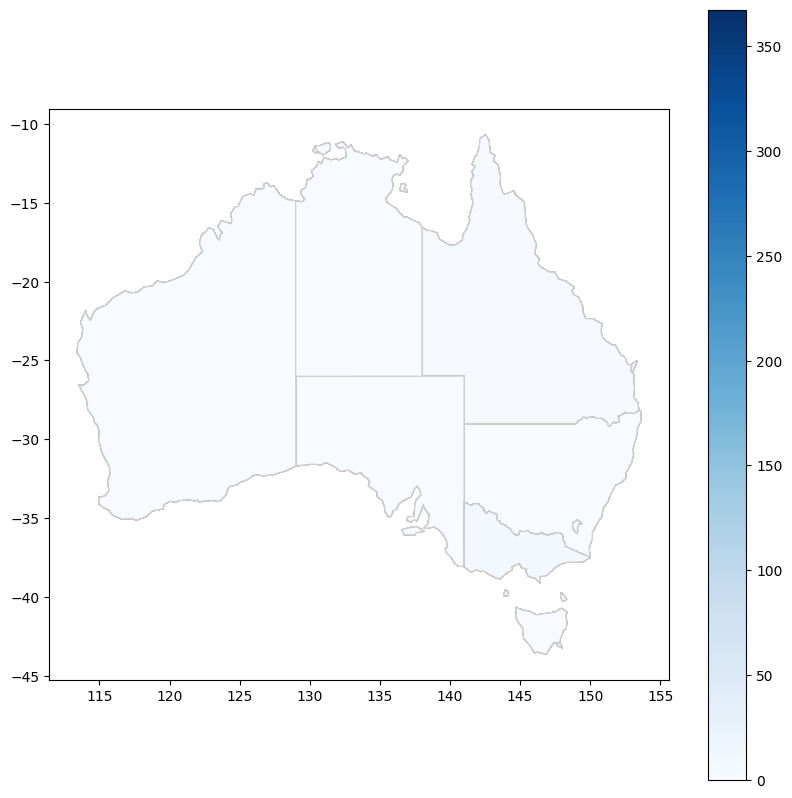

In [47]:
# Visualizar el mapa coroplético
import matplotlib.pyplot as plt

# Merge df_precipitaciones with merged_gdf on the 'city' column
merged_gdf = merged_gdf.merge(df_precipitaciones, on='city', how='left')


# Before plotting, ensure gdf_merge is not empty
if not merged_gdf.empty:
    # Crear el gráfico de los departamentos
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='white', edgecolor='black')

    # Agregar la capa de lluvia
    merged_gdf.plot(ax=ax, column='Rainfall', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)  # Now 'Rainfall' column should be available

    # Mostrar el gráfico
    plt.show()
else:
    print("gdf_merge is empty. Check the merge operation in the previous steps.")